# Volatile Travel Along The Surface of Mercury

Author: **Kevin Lie-Atjam**

Run this module to get the necessary functionality

In [1]:
import matplotlib.pyplot as plt
import src.expectation as statistics
import src.model as model

## Introduction

In Butler's paper "The migration of volatiles on the surface of Mercury and the moon" published in 1997, water and carbon dioxide traverse the surface of Mercury and the Moon through a process called volatile migration. Butler runs a simulation where molecules of either water or carbon dioxide are randomly placed along the surface of Mercury and the moon. We are interested with the surface of Mercury. When the molecules are allowed to move due to thermodynamic processes, around 5-15% of the water molecules in the simulation traveled to cold trap depositions located near the poles of the planet. This project verifies the results outlined in the paper as well as view statistically how the volatiles are lost and where it occurs.


# Abstractions and Modeling Decisions

There were a couple of modeling decisions that had to be made to try and replicate the results described in the paper outlined by Butler. Here were a couple of the deicions made.

1. Velocity PDF: The Velocity PDF was the largest design decision that deviated from the paper.

One of the velocity PDF's was demonstrated as the following

$f(v_0) = 4\pi(\frac{m}{2\pi k_b T})^\frac{3}{2}v_0^2e^{\frac{-mv_0^2}{2k_b T}}$

This is a probability density function which means that the area underneath the entire domain must equal 1.
$\int_{-\infty}^{\infty}4\pi(\frac{m}{2\pi k_b T})^\frac{3}{2}v_0^2e^{\frac{-mv_0^2}{2k_b T}} \ dv_0 = 1$

Notice how there is a Gaussian term multipied by an quadratic. We can approximate this PDF more simply by modeling it to a Gaussian distribution curve without the quadratic term. We must first find the average  of the velocities generated from the PDF. This is called finding the expectation value of the velocity function and it can be done by multiplying a velocity operator within the integrand.

$\langle v_0 \rangle = \int_{-\infty}^{\infty}4\pi(\frac{m}{2\pi k_b T})^\frac{3}{2}v_0^3e^{\frac{-mv_0^2}{2k_b T}} \ dv_0$

This function is an odd function which means that the area on the left side has a negative but equal value to the area on the right side. As a result, this integral is simply equal to zero.

We will then want to find the expectation value of the velocity squared which isn't as trivial to find

$\langle v_0^2 \rangle = \int_{-\infty}^{\infty}4\pi(\frac{m}{2\pi k_b T})^\frac{3}{2}v_0^4e^{\frac{-mv_0^2}{2k_b T}} \ dv_0$

Solving this integral analytically yields

$\langle v_0^2 \rangle = \frac{3 k_b T}{m}$

We can then used this to find standard deviation which is equal to the following

$\sigma_{v_0} = \sqrt{\langle v_0^2 \rangle - \langle v_0 \rangle^2} = \sqrt{\frac{3 k_b T}{m} - 0} = \sqrt{\frac{3 k_b T}{m}}$

Temperature is defined as the average kinetic energy in an given system. That means that there is an average velocity which is equal to ${\frac{3 k_b T}{m}}$ by using a kinetic energy relationship. That essentially means that we can sample a random normal distribution curve with the mean of the Gaussian as well as the standard deviation of the Gaussian both being equal to ${\frac{3 k_b T}{m}}$ to get a close approximation. Additionally, this makes sense physically. If we were to say that the temperature of the system were absolute zero, there can be no temperature lower than absolute zero which means that all particles must be at absolute zero. The preceding formulation agreesw with this statement.

2. Lattitude Placement: The placement along the lattitude of Mercury was calculated on an $\cos^{-1}(\theta)$ distribution to place a bias on putting the molecules nearby to the equator rather than the poles of the planet. If this wasn't done, a proportional amount of molecules would be set into the cold trap immediately.

3. Longitude Placement: The paper states that the initial placement along the planet was assumed to be isotropic which implies that it is uniformly distributed. For that reason, the volatiles were randomly placed in reference to the longitude.

4. Launch Angle: The launch angle was calculated on an $\cos^{-1}(\theta)$ distribution to bias the angle close to 45 degrees which makes it less likely that the particle will launch at an angle close to 0 or 90 degrees.

5. Temperature Binning: In the paper, the temeperature of a volatile is defined by 10 degree lattitude bins which means that the temperatures are essentially discretized. Because assuming that the temperature along the planet is continuous does not deviate too much from the binning, the temperature along the planet can be assumed to be continous.

6. Loss Removal: The main losses in the simulation are photodestruction, Jeans escape, and cold trap deposition. Because Jeans escape is when the escape velocity is exceeded and that photodestruction depends on how long the volatile spends in the air, the order at which each of the volatiles are removed goes as follows: First the volatile is evaluated on whether or not it has escaped the atmosphere. If it lands then checked to see if the volatile has landed in a cold trap. After it has spent time in the air, there is a chance the volatile has encountered a photon for photodestruction. If none of those have happened, then the volatile is still in the simulation.


## Methodology
We want to set the initial conditions for the simulation. We will be simulating the volatile travel of water across the surface of Mercury to which all of the parameters have been set. We will then use the `simulate` function as a part of the `expectation.py` script which has been expressed as `statistics`

The `simulate` function takes two arguments. The first are the amount of hops experienced in the simulation. This is not mentioned in the paper, so we will assume that there are 5,000 hops in the simulation. Next are the number of simulations ran which is given as 50 runs. The simulation in the paper had 100,000 molecules to which we also initialized 100,000 molecules of water.

Running the block of code below should take somewhere around 80 seconds to get the results. Fortunately, the simulation does not need multiprocessing anymore due to the newest code infrastructure of decreasing the array size.

In [2]:
(photo_stats, cold_stats, 
 jean_stats, cold_phi, 
 cold_theta, jeans_phi, 
 jeans_theta, photo_phi,
 photo_theta) = statistics.simulate(5000, 50)

After the simulations have been ran, we want to analyze the results such as the average, median, and standard deviation which can be obtained below. We will mainly be focusing on the average.

In [3]:
photo_mean, photo_med, photo_std = statistics.calculate_statistics(photo_stats)
cold_mean, cold_med, cold_std = statistics.calculate_statistics(cold_stats)
jeans_mean, jeans_med, jeans_std = statistics.calculate_statistics(jean_stats)

And now we can visualize our results

## Results
Because there are so many molecules that were in the simulation, there are a few ways we should statistically represent our data. The first way we will do so is by representing the percentages that the molecules of water are lost through photodestruction, Jeans escape, and cold traps

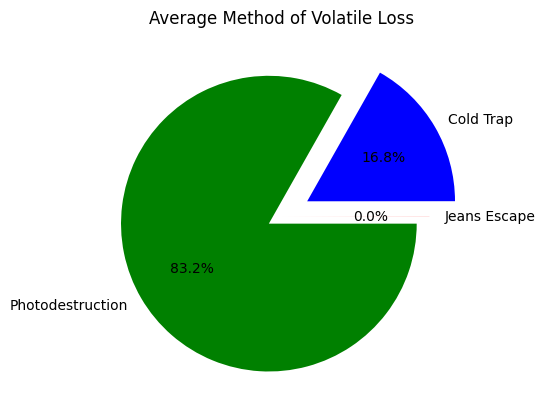

In [4]:
model.pie_plot(jeans_mean, cold_mean, photo_mean);
plt.title("Average Method of Volatile Loss");

As you can see, the amount lost due to Jeans escape is so small that it is almost negligible in the simulation which makes sense given how high the temperature of the surface has to be just to get a volatile to have a vertical component exceed the escape velocity. In addition, the most dominant form of escape was photodestruction. However, we would like to see the statistics of the cold trap as well as the Jeans escape a bit more in depth given that the cold trap was discussed in the paper in addition to the fact that we could investigate more into how small the Jeans escape is.

Cold trap standard deviation: 1.97%


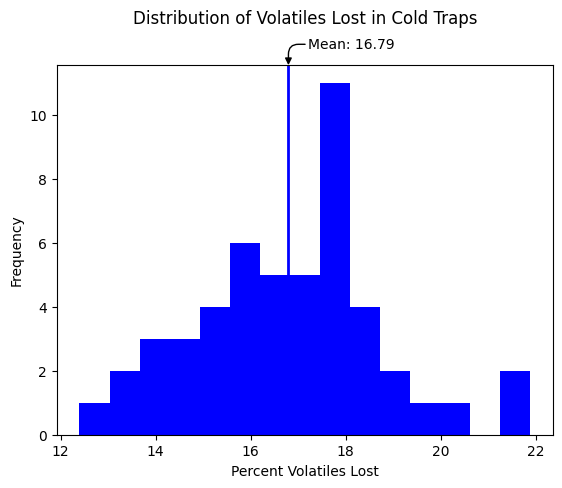

In [11]:
model.plot_histogram(cold_stats, "blue", 15);
plt.title("Distribution of Volatiles Lost in Cold Traps", pad=30);
plt.xlabel("Percent Volatiles Lost");
plt.ylabel("Frequency");
plt.axvline(cold_mean/1000, color='blue', linewidth=2);
plt.annotate("Mean: {:0.2f}".format(cold_mean/1000), xy=[cold_mean/1000, 1], xytext=(14, 15),
            xycoords=("data", "axes fraction"), textcoords="offset points",
            horizontalalignment="left", verticalalignment="center",
            arrowprops=dict(arrowstyle="-|>", fc="black", shrinkA=0, shrinkB=0,
                            connectionstyle="angle,angleA=0,angleB=90,rad=10"),
            );
print("Cold trap standard deviation: {:0.2f}%".format(cold_std/1000))

When we look at the cold trap data, we see a mean that is somewhere between 14%-16% with a standard deviation of about 2%. We'll explain a bit more about this data at the end of the essay.

Jeans Escape standard deviation: 0.0031%


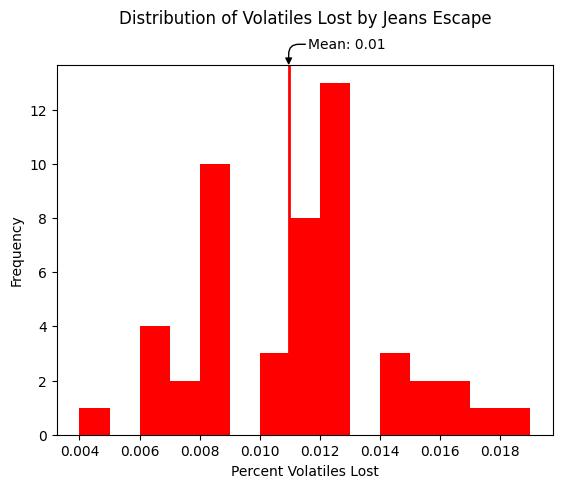

In [13]:
model.plot_histogram(jean_stats, "red", 15);
plt.title("Distribution of Volatiles Lost by Jeans Escape", pad=30);
plt.xlabel("Percent Volatiles Lost");
plt.ylabel("Frequency");
plt.axvline(jeans_mean/1000, color='red', linewidth=2);
plt.annotate("Mean: {:0.2f}".format(jeans_mean/1000), xy=[jeans_mean/1000, 1], xytext=(14, 15),
            xycoords=("data", "axes fraction"), textcoords="offset points",
            horizontalalignment="left", verticalalignment="center",
            arrowprops=dict(arrowstyle="-|>", fc="black", shrinkA=0, shrinkB=0,
                            connectionstyle="angle,angleA=0,angleB=90,rad=10"),
            );
print("Jeans Escape standard deviation: {:0.4f}%".format(jeans_std/1000))

For the Jeans escape, we see that although it does happen, both the mean and the standard deviation are incredibly small. In this run, the Jeans Escape mean only accounted for around 1% of the volatile loss. Now that we understand how the statistics came into play, now we should investigate where the volatile last was before being lost. To do this, we will randomly sample one of the results from one of the 50 simulations and plot the results.

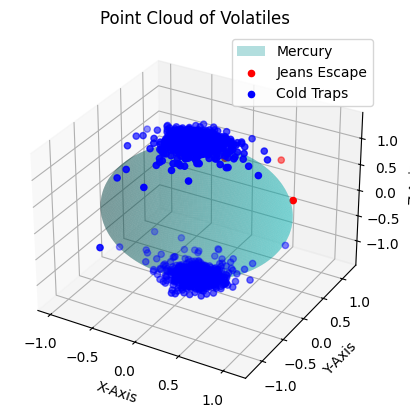

In [7]:
model.point_cloud(jeans_phi, jeans_theta, cold_phi, cold_theta, photo_phi, photo_theta);
plt.title("Point Cloud of Volatiles");


As expected, when the volatiles are lost due to cold traps, they are located near or on the poles of the planet which are the coolest areas in the simulation. On the other hand, the volatiles lost to Jeans escape are scattered along the planet near the equator before getting lost. There could be a case where a volatile lost to Jeans escape is close to a pole, but it is rare. The photodestruction points in the point cloud have not been added due to a large amount of them blocking the rest of the other points on the point cloud. An image of all volatile losses in a point cloud has been included below.

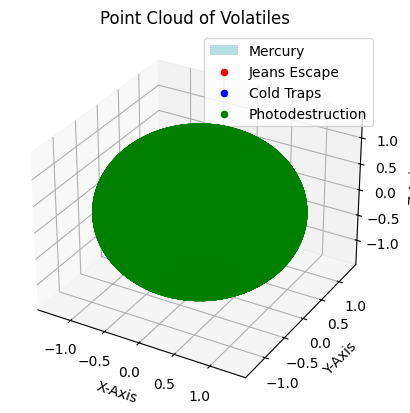


## Discussion

As we can see from the point cloud that we created, our results do make sense in the context of the end results of the simulation. Because Jeans escape and Photodestruction are not temperature dependent which does depend on the position, it makes sense as to why either can virtually be lost anywhere. On the other hand, cold trap loss does depend on the temperature which is a factor that does depend on latitude which does mean that we should expect to see more cold trap loss at the poles which is what we see. Although the simulation is logically accurate, the loss mechanism have some questioning to be desired. While it is mentioned in the abstract that the amount of water lost due to cold traps on Mercury is somewhere between 5%-15% (Which our mean does fall close to nearby the 15% mark), it is stated in another section of the paper that the percentage of the number of molecules that landed in an infinitely stable region of the planet was around 9.63% $\pm$ 0.09% which the results fall out of. This implies that our results and the way that our simulation ran was plausible and was consistent with the paper, but some more accuracy can be desired to get closer to the result of the 9.63% $\pm$ 0.09% value. These can likely be attributed to a couple of limiting factors.

### Limitations and Future Work

 The biggest abstraction was to alter the velocity PDF in the simulation where we modeled it under a simple Gaussian distribution. This was still able to provide us with precise simulation results, but this then loses some modeling accuracy. A graph of both effective PDFs have been included below
 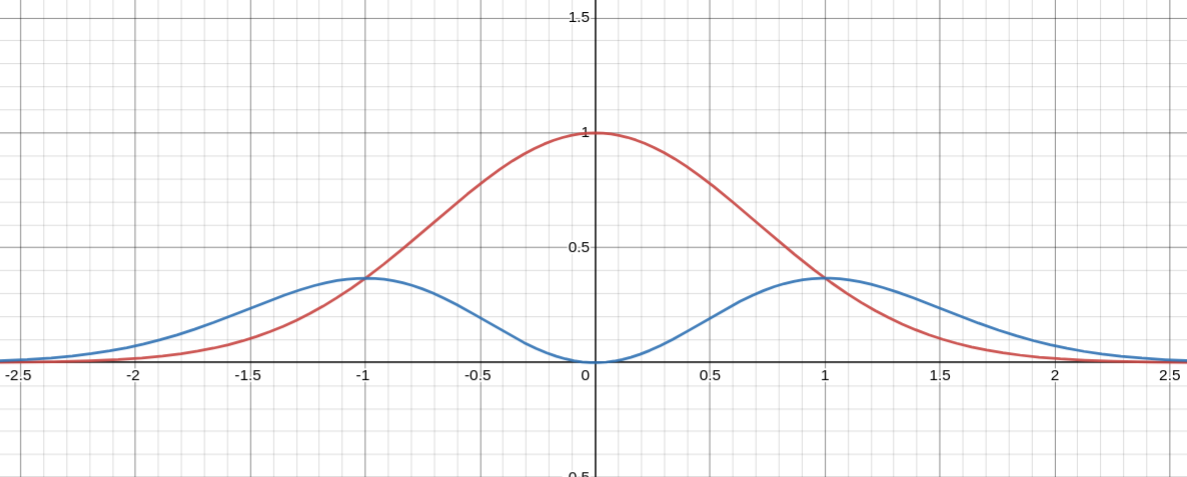

 The red line indicates the PDF used in our simulation while the blue line indicates the PDF used in the paper. Both have the same mean and standard deviation, but the blue line has a higher chance of selecting velocities that are further away from the mean. The red line has a higher chance of selecting velocities closer to the mean. That implies that with the blue PDF, there can be more particles to quickly get to cold spots, but there are also more particles that are traveling slower which means more time in the simulation to be taken by other means such as Jeans escape and photodestruction. A future alteration would be to include the PDF properly rather than approximate it to get closer to the $n_{stable}$ value.

 Another modeling choice made that was going to be extended upon was the use of constant gravity for simplicity of the model. In actuality, the gravity of the system varies which means that the volatile will have more air time and will have a larger chance of being lost due to photodestruction rather than being lost on a cold trap. So including variable gravity would certainly see a lower value in the number of particles lost due to cold traps.

 One last thing to note is that the simulation does not take into account some of the temeperature gradients due to the Sun being present on only around half of the planet. The other half of the planet would be darker and would therefore be cooler which would cause some of the volatiles to deposit on the surface of Mercury earlier in the simulation rather than later. This would also mean that the velocity of the volatiles would be slower which also provides a greater chance of other loss mechanisms to take precedence. Implementing a more dynamic surface to work with would help to obtain the results obtained in the paper.

## Sources
* Butler, Bryan J. "The migration of volatiles on the surfaces of Mercury and the Moon." Journal of Geophysical Research: Planets 102.E8 (1997): 19283-19291.

* Butler, Bryan J., Duane O. Muhleman, and Martin A. Slade. "Mercury: Full‐disk radar images and the detection and stability of ice at the north pole." Journal of Geophysical Research: Planets 98.E8 (1993): 15003-15023.